In [175]:
from skimage.measure import shannon_entropy as se
import numpy as np
import matplotlib.pyplot as plt

In [176]:
width = 32
height = 128

noise = np.random.random((height, width))

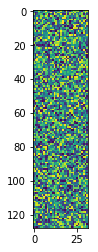

In [177]:
plt.imshow(noise)
plt.show()

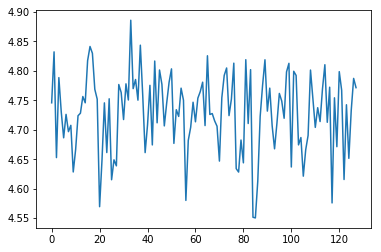

In [178]:
noise_rows = [np.array(noise[i]).reshape(1, -1) for i in xrange(height)]
row_entropy = map(se, noise_rows)
plt.plot(row_entropy)
plt.show()

[[], [], [], [], []]


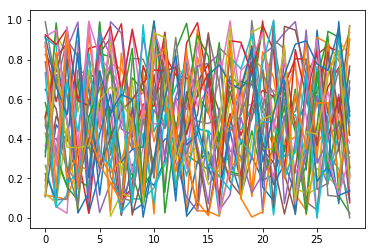

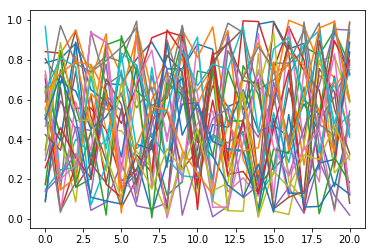

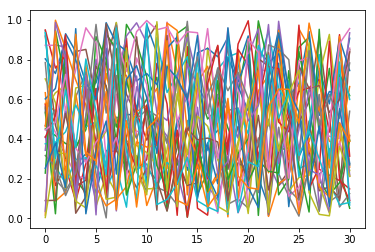

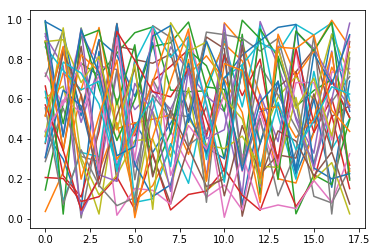

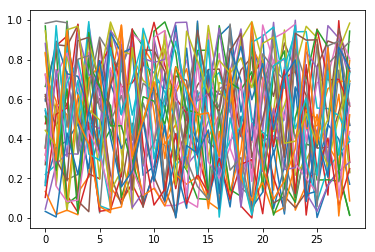

In [235]:
from sklearn.cluster import KMeans
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(noise)
clusters = [[] for i in range(n_clusters)]
print(clusters)
for row in noise_rows:
    clusters[kmeans.predict(row)[0]].append(row[0])
for cluster in clusters:
    plt.plot(cluster)
    plt.show()

cluster 0, mean entropy: 4.72850387429


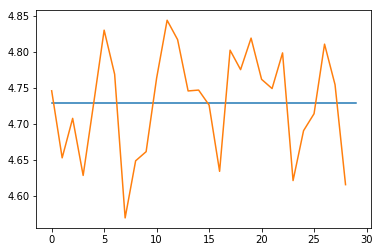

cluster 1, mean entropy: 4.73793046527


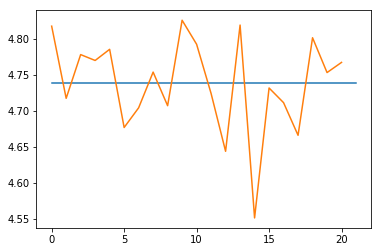

cluster 2, mean entropy: 4.70886391035


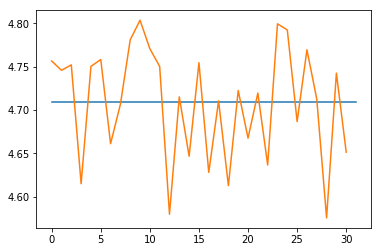

cluster 3, mean entropy: 4.76427316896


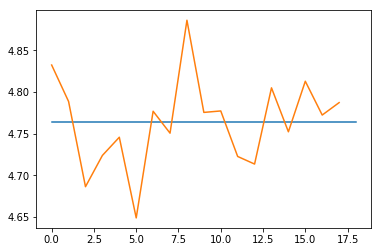

cluster 4, mean entropy: 4.72263629575


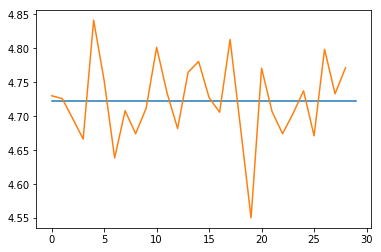

In [236]:
ents = [[] for i in range(n_clusters)]
for i, cluster in enumerate(clusters):
    for row in cluster:
        ents[i].append(se(row))
for i, ent in enumerate(ents):
    plt.plot([0, len(ent)], [np.mean(ent), np.mean(ent)])
    plt.plot(ent)
    print("cluster {}, mean entropy: {}".format(i, np.mean(ent)))
    plt.show()

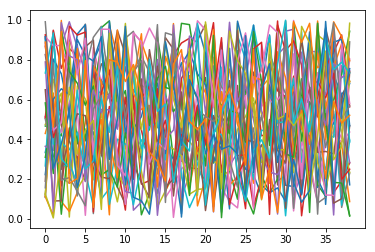

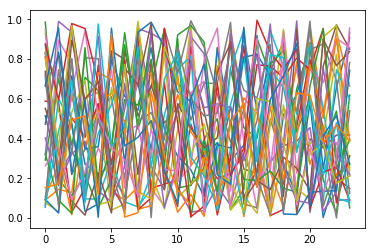

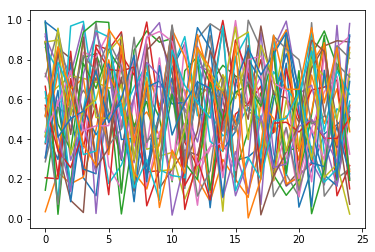

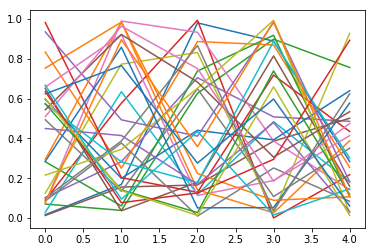

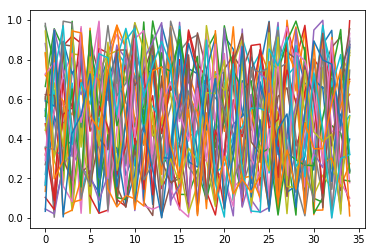

In [233]:
entropies = [se(row) for row in noise_rows]
e_kmeans = kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(np.array(entropies).reshape(-1, 1))
e_clusters = [[] for i in range(n_clusters)]
for i, ent in enumerate(entropies):
    e_clusters[e_kmeans.predict(ent)[0]].append(noise[i])
for cluster in e_clusters:
    plt.plot(cluster)
    plt.show()

cluster 0, mean entropy: 4.76090602796


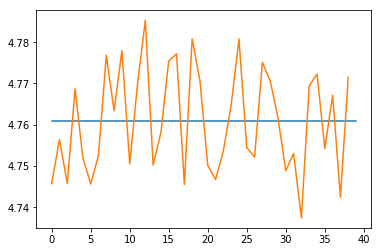

cluster 1, mean entropy: 4.64758879538


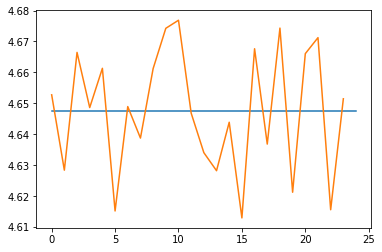

cluster 2, mean entropy: 4.81346678059


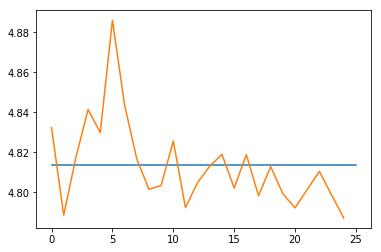

cluster 3, mean entropy: 4.56536850498


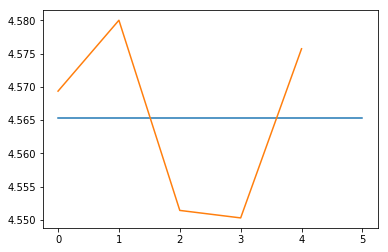

cluster 4, mean entropy: 4.71229499271


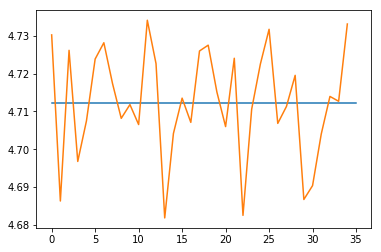

In [238]:
for i, ent in enumerate(e_clusters):
    ent = map(se, ent)
    plt.plot([0, len(ent)], [np.mean(ent), np.mean(ent)])
    plt.plot(ent)
    print("cluster {}, mean entropy: {}".format(i, np.mean(ent)))
    plt.show()